<a href="https://colab.research.google.com/github/lirui720/Google-E-Commerce-RFM-model/blob/main/RFM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('/content/drive/MyDrive/RFM.csv')
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head()

,fullVisitorId,date,revenue
0,4474128110841843619,2017-06-12,122.96
1,7731550683138800842,2016-10-07,47.18
2,9549186864389701668,2017-06-21,16.99
3,8986872282597680783,2017-05-21,34.19
4,9804405852019862459,2017-06-12,13.98


In [43]:
df_recency = df.groupby(by='fullVisitorId',
                        as_index=False)['date'].max()
df_recency.columns = ['fullVisitorId', 'date']
recent_date = df_recency['date'].max()
df_recency['Recency'] = df_recency['date'].apply(
    lambda x: (recent_date - x).days)
df_recency.head()


,fullVisitorId,date,Recency
0,213131142648941,2017-04-28,95
1,435324061339869,2016-10-20,285
2,562678147042735,2017-04-24,99
3,585708896049892,2016-12-21,223
4,670722016498267,2017-07-10,22


In [44]:
frequency_df = df.drop_duplicates().groupby(
    by=['fullVisitorId'], as_index=False)['date'].count()
frequency_df.columns = ['fullVisitorId', 'Frequency']
frequency_df.head()

,fullVisitorId,Frequency
0,213131142648941,1
1,435324061339869,1
2,562678147042735,1
3,585708896049892,1
4,670722016498267,1


In [45]:

monetary_df = df.groupby(by='fullVisitorId', as_index=False)['revenue'].sum()
monetary_df.columns = ['fullVisitorId', 'Monetary']
monetary_df.head()

,fullVisitorId,Monetary
0,213131142648941,39.59
1,435324061339869,46.79
2,562678147042735,158.31
3,585708896049892,45.97
4,670722016498267,43.98


In [46]:
rf_df = df_recency.merge(frequency_df, on='fullVisitorId')
rfm_df = rf_df.merge(monetary_df, on='fullVisitorId').drop(
    columns='date')
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary
0,213131142648941,95,1,39.59
1,435324061339869,285,1,46.79
2,562678147042735,99,1,158.31
3,585708896049892,223,1,45.97
4,670722016498267,22,1,43.98


In [47]:
rfm_df['R_rank'] = rfm_df['Recency'].rank(ascending=False)
rfm_df['F_rank'] = rfm_df['Frequency'].rank(ascending=True)
rfm_df['M_rank'] = rfm_df['Monetary'].rank(ascending=True)
 
rfm_df['R_rank_norm'] = (rfm_df['R_rank']/rfm_df['R_rank'].max())*100
rfm_df['F_rank_norm'] = (rfm_df['F_rank']/rfm_df['F_rank'].max())*100
rfm_df['M_rank_norm'] = (rfm_df['F_rank']/rfm_df['M_rank'].max())*100
 
rfm_df.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
rfm_df.head()

,fullVisitorId,Recency,Frequency,Monetary,R_rank_norm,F_rank_norm,M_rank_norm
0,213131142648941,95,1,39.59,71.204451,45.173069,45.173069
1,435324061339869,285,1,46.79,21.668087,45.173069,45.173069
2,562678147042735,99,1,158.31,69.765927,45.173069,45.173069
3,585708896049892,223,1,45.97,42.584332,45.173069,45.173069
4,670722016498267,22,1,43.98,91.940254,45.173069,45.173069


In [48]:
rfm_df['RFM_Score'] = 0.15*rfm_df['R_rank_norm']+0.28 * \
    rfm_df['F_rank_norm']+0.57*rfm_df['M_rank_norm']
rfm_df['RFM_Score'] *= 0.05
rfm_df = rfm_df.round(2)
rfm_df[['fullVisitorId', 'RFM_Score']].head(7)

,fullVisitorId,RFM_Score
0,213131142648941,2.45
1,435324061339869,2.08
2,562678147042735,2.44
3,585708896049892,2.24
4,670722016498267,2.61
5,852801263780322,2.59
6,1123528056036404,2.20


In [50]:
rfm_df["Customer_segment"] = np.where(rfm_df['RFM_Score'] >
                                      4.5, "Top Customers",
                                      (np.where(
                                        rfm_df['RFM_Score'] > 4,
                                        "High value Customer",
                                        (np.where(
    rfm_df['RFM_Score'] > 3,
                             "Medium Value Customer",
                             np.where(rfm_df['RFM_Score'] > 1.6,
                            'Low Value Customers', 'Lost Customers'))))))
rfm_df[['fullVisitorId', 'RFM_Score', 'Customer_segment']].head(20)

,fullVisitorId,RFM_Score,Customer_segment
0,213131142648941,2.45,Low Value Customers
1,435324061339869,2.08,Low Value Customers
2,562678147042735,2.44,Low Value Customers
3,585708896049892,2.24,Low Value Customers
4,670722016498267,2.61,Low Value Customers
5,852801263780322,2.59,Low Value Customers
6,1123528056036404,2.20,Low Value Customers
7,1905118576359487,2.08,Low Value Customers
8,2527528149176601,2.16,Low Value Customers
9,2709834583138581,2.22,Low Value Customers


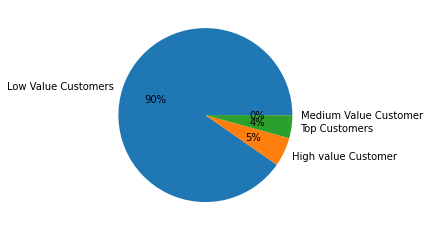

In [51]:
plt.pie(rfm_df.Customer_segment.value_counts(),
        labels=rfm_df.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()